The electric car sharing service, based in Paris, has contracted our services to figure out several insights using the data they have collected over time. The company would like to know when is the most popular time for picking up a shared car (Blue Car). 

#Importing Libraries and Loading the files 

In [1]:
# Import the libraries needed for this project.
# importing pandas
import pandas as pd

# Importing numpy
import numpy as np

#
import sys


In [2]:
#load the file
df = pd. read_csv('/content/Autolib_dataset (2).csv')

In [3]:
#load the first 10 lines of the dataframe.
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [4]:
#Understanding the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

# Cleaning the Data 

In [5]:
#The main question by the client is the most popular hour the cars are picked up 
# therefore some of the column in the data frame are irrelevant. 
#remove the Displayed comment, Scheduled at, Subscription status and Geo point columns and save the changes

df.drop (columns=['Displayed comment', 'Scheduled at', 'Subscription status', 'Geo point'], inplace= True)

In [6]:
# checkif the dropped columns applied. 
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23


In [7]:
#uniformity checks
#fixing column names. 
#pascal case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(5)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,public_name,rental_status,slots,station_type,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23


In [8]:
#check for missing values
df.count()

address               5000
cars                  5000
bluecar_counter       5000
utilib_counter        5000
utilib_1.4_counter    5000
charge_slots          5000
charging_status       5000
city                  5000
id                    5000
kind                  5000
postal_code           5000
public_name           5000
rental_status         5000
slots                 5000
station_type          5000
status                5000
year                  5000
month                 5000
day                   5000
hour                  5000
minute                5000
dtype: int64

In [9]:
#lets merge the hour and minute column and call it time 
df['time'] = (pd.to_datetime(df['hour'].astype(str) + ':' + df['minute'].astype(str), format='%H:%M')
          .dt.time)
df['time'].head(5)

0    11:43:00
1    07:24:00
2    20:14:00
3    04:37:00
4    17:23:00
Name: time, dtype: object

In [40]:
#Test
df.head(5)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,public_name,rental_status,slots,station_type,status,year,month,day,hour,minute,time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43,11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24,07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14,20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37,04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23,17:23:00


In [11]:
# look for duplicates
df.duplicated().any()


False

In [12]:
# Clean data

# Analysis 
The company has posed several questions. 

In [39]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
#first create a temporary dataframe with records of the month of april and in the city of Paris
tempdf = df[(df['city'] == 'Paris') & (df['month'] == 4)] 
tempdf

#groupby the hour 
hour_df = tempdf.groupby(["hour",'city' ])['bluecar_counter'].sum()
hour_df

#find the maximum value in the hour_df

hour_df[[hour_df.idxmax()]]



hour  city 
21    Paris    268
Name: bluecar_counter, dtype: int64

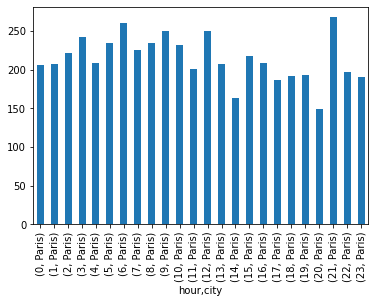

In [14]:
hour_df.plot.bar(x='hour')


In [15]:
# Bonus Questions (Optional)


# What station is the most popular?
# Overall?
# At the most popular picking hour?
# What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
# Overall?
# At the most popular picking hour?
# Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

In [16]:
# What is the most popular hour for returning cars?
return_time = tempdf[(tempdf['slots'] == 0)]
return_time = return_time.groupby(["hour",'city' ])['slots'].count()
return_time[[return_time.idxmin()]]

hour  city 
4     Paris    24
Name: slots, dtype: int64

In [17]:
# What station is the most popular?
# the sation witht the most cars will be the most popular one

station_df = tempdf[(tempdf['kind'] == 'STATION')]

popular_df = station_df.groupby(["id", 	"kind" ,'bluecar_counter','utilib_counter',	'utilib_1.4_counter' ])["cars"].sum()
popular_df.sort_values(ascending= False).head(1)

id                         kind     bluecar_counter  utilib_counter  utilib_1.4_counter
paris-philippeauguste-126  STATION  6                0               0                     24
Name: cars, dtype: int64

In [25]:
# Overall
# # At the most popular picking hour?
hour2_df = df.groupby(["hour"])['bluecar_counter'].sum()
hour2_df
hour2_df[[hour2_df.idxmax()]]

hour
6    608
Name: bluecar_counter, dtype: int64